In [2]:
import sys
sys.path.append('/home/daisy/geuv/code/transethnic_prs-main/')
print(sys.path)
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path, enet_path
import transethnic_prs.model1.Model1Blk as model1blk

['/home/daisy/geuv', '/home/daisy/geuv/code/transethnic_prs-main', '/home/daisy/geuv', '/home/daisy/geuv/code/transethnic_prs-main/transethnic_prs', '/home/daisy/anaconda3/envs/transethnic_prs/lib/python37.zip', '/home/daisy/anaconda3/envs/transethnic_prs/lib/python3.7', '/home/daisy/anaconda3/envs/transethnic_prs/lib/python3.7/lib-dynload', '', '/home/daisy/anaconda3/envs/transethnic_prs/lib/python3.7/site-packages', '/home/daisy/anaconda3/envs/transethnic_prs/lib/python3.7/site-packages/IPython/extensions', '/home/daisy/.ipython', '/home/daisy/geuv/code/transethnic_prs-main/']


In [3]:
pheno_total = pd.read_csv('data/GD462.GeneQuantRPKM.50FN.samplename.resk10.txt', sep = '\t', index_col = 'TargetID')
target_pheno_total = pheno_total.loc['ENSG00000167074.9']

b_hat_eur_total = pd.read_csv('data/EUR373.gene.cis.FDR5.all.rs137.txt', sep = '\t')
b_hat_eur_total_grouped = dict(list(b_hat_eur_total.groupby('GENE_ID')))
b_hat_eur_target = b_hat_eur_total_grouped['ENSG00000167074.9']

eur_sample = pd.read_csv('data/clean/eur_genotype.012.indv', sep = '\t', header = None)
afr_sample = pd.read_csv('data/clean/afr_genotype.012.indv', sep = '\t',header = None)

target_pheno_eur = pd.merge(target_pheno_total, eur_sample, left_index = True, right_on = 0)
target_pheno_afr = pd.merge(target_pheno_total, afr_sample, left_index = True, right_on = 0)

eur_genotype = pd.read_csv('data/clean/eur_genotype.012', sep = '\t', header = None, index_col = 0)
afr_genotype = pd.read_csv('data/clean/afr_genotype.012', sep = '\t', header = None, index_col = 0)

pa = target_pheno_afr.set_index(0)
pe = target_pheno_eur.set_index(0)

sorted_eur_pheno = pd.merge(eur_sample, pe, left_on = 0 , right_index = True, how = 'left')
sorted_afr_pheno = pd.merge(afr_sample, pa, left_on = 0 , right_index = True, how = 'left')
sorted_b_hat_eur = b_hat_eur_target.sort_values(by = 'SNPpos')

X1o = eur_genotype
X2o = afr_genotype
b1_hat = sorted_b_hat_eur['rvalue']
y1o = sorted_eur_pheno['ENSG00000167074.9']
y2o = sorted_afr_pheno['ENSG00000167074.9']
R1 = X1o.cov()

In [4]:
X1 = (X1o-X1o.mean())
X2 = (X2o-X2o.mean())
y1 = (y1o-y1o.mean())
y2 = (y2o-y2o.mean())
N1 = 373
N2 = 89

In [5]:
for idx1,x1 in enumerate(X1.std()):
    if x1==0:
        print(idx1)
idx_valid = []
count = 0
for idx2,x2 in enumerate(X2.std()):
    if x2==0:
        count +=1
    else:
        idx_valid.append(idx2)
        #print(idx2)
print(count)
print(idx_valid)

133
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 218, 219, 220, 221, 222, 223, 225, 227, 228, 230

In [6]:
X1 = np.array(X1,dtype = np.float64,order = 'C')
X1o = np.array(X1o,dtype = np.float64,order = 'C')
X2 = np.array(X2,dtype = np.float64,order = 'C')
X2o = np.array(X2o,dtype = np.float64,order = 'C')
#b1_hat = np.array(b1_hat, dtype = np.float64,order = 'C')
y1 = np.array(y1, dtype = np.float64, order = 'C')
y1o = np.array(y1o,dtype = np.float64,order = 'C')
y2 = np.array(y2, dtype = np.float64, order = 'C')
y2o = np.array(y2o,dtype = np.float64,order = 'C')
R1 = np.array(R1,dtype = np.float64, order = 'C')

In [7]:
X1 = X1[:,idx_valid]
X2 = X2[:,idx_valid]
X1o = X1o[:,idx_valid]
X2o = X2o[:,idx_valid]

In [26]:
X1 = X1/np.std(X1o, axis = 0)
X2 = X2/np.std(X2o, axis = 0)
np.isnan(X2).any(axis=0)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [27]:
y1 = y1/y1o.std()
y2 = y2/y2o.std()

In [28]:
R1 = np.cov(X1.T)
D_R1 = np.diag(np.diag(R1))
R1.shape

(736, 736)

In [29]:
A1 = X1.T @ X1
A1_t = (N1-1)*R1
#b1_t = (N1-1) * (D_R1 @ b1_hat) ? b1_hat maybe after filtered?
b1 = X1.T @ y1
print(A1[0:5])
print(A1_t[0:5])

[[575.63144044 440.0232841  430.48624234 ... 101.04842072 100.8897228
   99.4950306 ]
 [440.0232841  575.63144044 568.37491349 ... 113.28612278 114.68060928
  113.09527286]
 [430.48624234 568.37491349 575.63144044 ...  99.92826666 101.01305928
  104.45670571]
 [440.0232841  575.63144044 568.37491349 ... 113.28612278 114.68060928
  113.09527286]
 [440.0232841  575.63144044 568.37491349 ... 113.28612278 114.68060928
  113.09527286]]
[[575.63144044 440.0232841  430.48624234 ... 101.04842072 100.8897228
   99.4950306 ]
 [440.0232841  575.63144044 568.37491349 ... 113.28612278 114.68060928
  113.09527286]
 [430.48624234 568.37491349 575.63144044 ...  99.92826666 101.01305928
  104.45670571]
 [440.0232841  575.63144044 568.37491349 ... 113.28612278 114.68060928
  113.09527286]
 [440.0232841  575.63144044 568.37491349 ... 113.28612278 114.68060928
  113.09527286]]


In [30]:
X1 = np.array(X1,dtype = np.float64,order = 'C')
X2 = np.array(X2,dtype = np.float64,order = 'C')

yanyu's solever

In [31]:
mod1 = model1blk.Model1Blk([A1], [b1], [X2], y2)

In [32]:
l1_ratio = 0.1
t = time.time()
beta_mat_en, lambda_seq_en, niters_en, tols_en, convs_en = mod1.solve_path(alpha=l1_ratio) 
print(f'Run time = {time.time()-t} s')

Run time = 2.9431958198547363 s


In [33]:
# lasso 
t = time.time()
beta_mat_lasso, lambda_seq_lasso, niters_lasso, tols_lasso, convs_lasso = mod1.solve_path(alpha=1) 
print(f'Run time = {time.time()-t} s')

Run time = 3.3396639823913574 s


In [ ]:
result prediction

In [34]:
beta_mat_lasso[:,1:].shape

(736, 99)

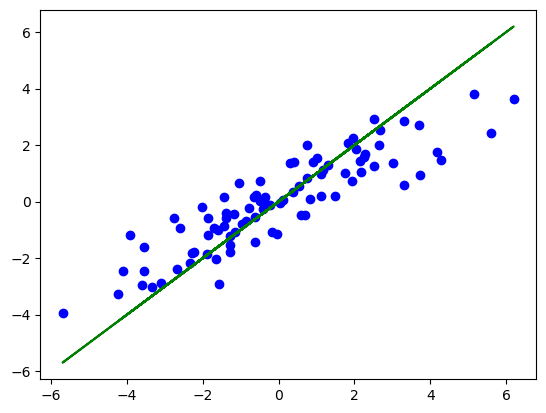

In [35]:
y2_hat_lasso = X2 @ beta_mat_lasso[:,-1:]
plt.scatter(y2, y2_hat_lasso, color = "blue")
plt.plot(y2,y2,color = 'g')
plt.show()

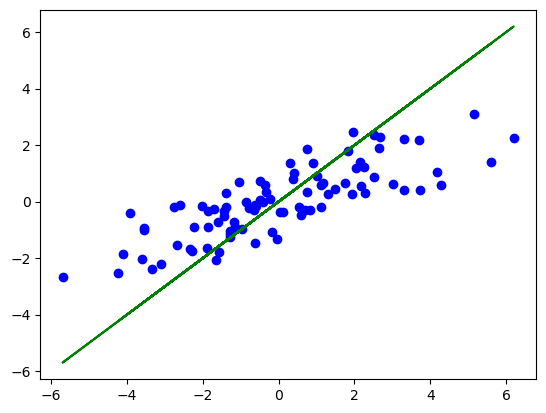

In [36]:
y2_hat_en = X2 @ beta_mat_en[:,-1:]
plt.scatter(y2, y2_hat_en, color = "blue")
plt.plot(y2,y2,color = 'g')
plt.show()

In [37]:
beta_mat_lasso[:,99].mean()

0.0045981375621805395

scipy.optimize solver

In [38]:
from scipy import optimize

In [39]:
beta = np.zeros(736)

In [40]:
#lasso:
def lasso_fun(beta):
    term1 = beta.T @ A1 @ beta - 2 * b1.T @ beta
    term2 = np.linalg.norm(y2 - X2 @ beta)**2 #L2 norm should be squared here(least square)
    penalty = np.linalg.norm(beta, ord = 1)
    return term1 + term2 + penalty

In [41]:
t = time.time()
result = optimize.minimize(lasso_fun, beta)
print(f'Run time = {time.time()-t} s')

Run time = 163.54299879074097 s


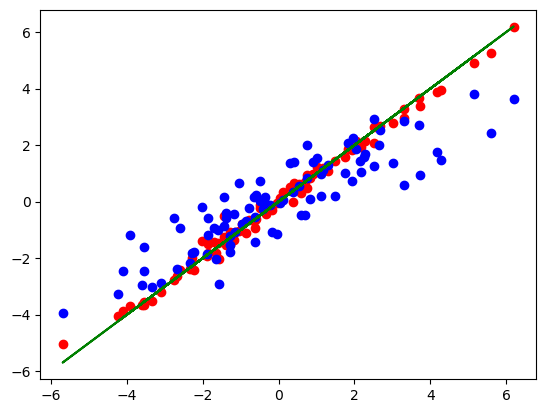

In [42]:
y2_hat_lasso_op = X2 @ result.x
plt.scatter(y2, y2_hat_lasso_op, color = "red")# red dots are scipy.optimize results
plt.scatter(y2, y2_hat_lasso, color = "blue")# blue dots are yanyu's solver results
plt.plot(y2,y2,color = 'g')
plt.show()

In [43]:
def EN(beta):
    term1 = beta.T @ A1 @ beta - 2 * b1.T @ beta
    term2 = np.linalg.norm(y2 - X2 @ beta)**2 #L2 norm should be squared here(least square)
    ridge = np.linalg.norm(beta)**2
    lasso = np.linalg.norm(beta, ord = 1)
    penalty = 0.1 * lasso + 0.9 * ridge
    return term1 + term2 + penalty

In [44]:
t = time.time()
result_EN = optimize.minimize(EN,beta)
print(f'Run time = {time.time()-t} s')

Run time = 154.05040621757507 s


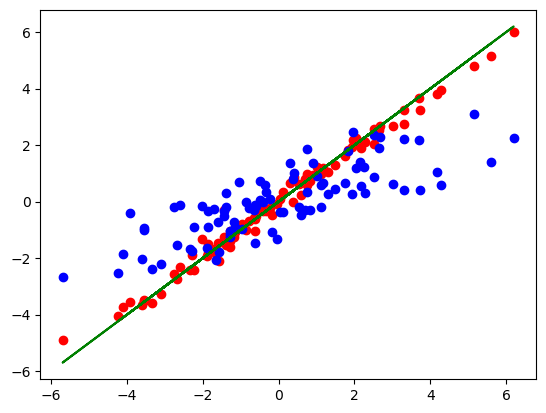

In [45]:
y2_hat_en_op = X2 @ result_EN.x
plt.scatter(y2, y2_hat_en_op, color = "red")# red dots are scipy.optimize results
plt.scatter(y2, y2_hat_en, color = "blue")# blue dots are yanyu's solver results
plt.plot(y2,y2,color = 'g')
plt.show()